![Sunny Savita - Realtime Powerful RAG Pipeline using Neo4j(Knowledge Graph Db) and Langchain #rag [Ik8gNjJ-13I - 782x440 - 1m04s].png](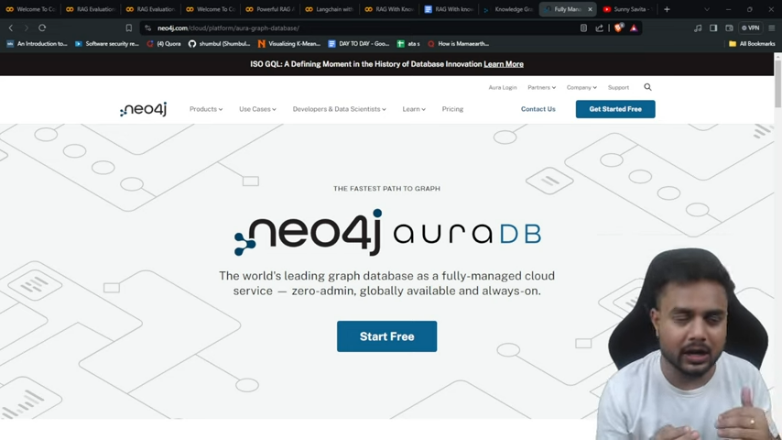)

In [ ]:
!pip install --upgrade --quiet langchain langchain-community langchain-experimental langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.6 MB/s eta 0:00:00


Neo4j = is a knowledge gaph db.

![Sunny Savita - Realtime Powerful RAG Pipeline using Neo4j(Knowledge Graph Db) and Langchain #rag [Ik8gNjJ-13I - 786x442 - 6m53s].png](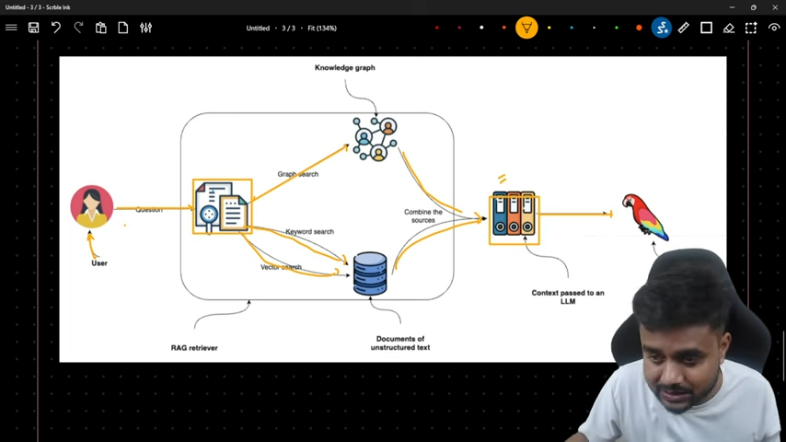)

![Sunny Savita - Realtime Powerful RAG Pipeline using Neo4j(Knowledge Graph Db) and Langchain #rag [Ik8gNjJ-13I - 786x442 - 9m19s].png](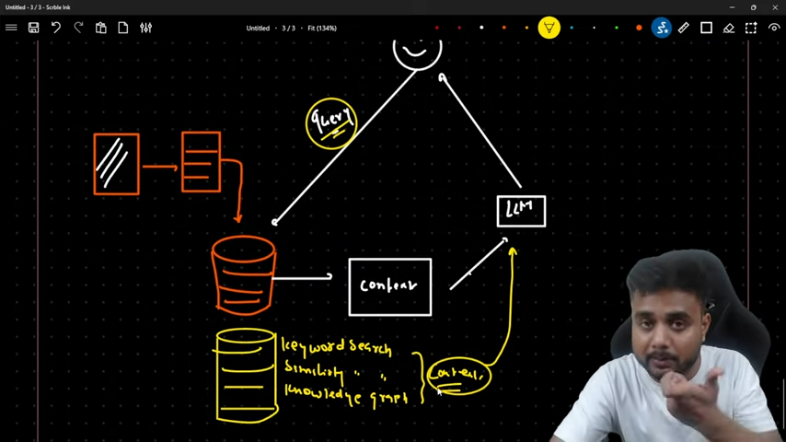)

In [ ]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get("GOOGLE_API_KEY")

In [ ]:
from langchain_community.graphs.neo4j_graph import Neo4jGraph

In [ ]:
!pip install wikipedia --quiet

  Preparing metadata (setup.py) ... done


In [ ]:
from langchain_community.document_loaders import WikipediaLoader
raw_documents = WikipediaLoader(query = "Elizabeth I").load()

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [ ]:
for doc in raw_documents:
    print(doc.page_content[:200])  # Display the first 200 characters of each document
    print("\n---\n")

Elizabeth I (7 September 1533 – 24 March 1603) was Queen of England and Ireland from 17 November 1558 until her death in 1603. She was the last monarch of the House of Tudor.
Elizabeth was the only su

---

Elizabeth or Elizaveta Petrovna (Russian: Елизаве́та Петро́вна; 29 December [O.S. 18 December] 1709 – 5 January [O.S. 25 December] 1762) was Empress of Russia from 1741 until her death in 1762. She re

---

The portraiture of Queen Elizabeth I (1533–1603) spans the evolution of English royal portraits in the early modern period (1400/1500-1800), from the earliest representations of simple likenesses to t

---

The succession to the childless queen of England Elizabeth I was an open question from her accession in 1558 to her death in 1603, when the crown passed to James VI of Scotland. While the accession of

---

The House of Tudor ( TEW-dər) was an English and Welsh dynasty that held the throne of England from 1485 to 1603. They descended from the Tudors of Penmynydd, a Welsh noble

In [ ]:
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 5.2 MB/s eta 0:00:00


In [ ]:
NEO4J_URI = "neo4j+s://f29b1e4a.databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = "ZCfvuqEUd37s6ettW4TOiHZcrpwlzwRaNRzR_lcW_l0"

In [ ]:
import os

os.environ["GOOGLE_API_KEY"] = GEMINI_API_KEY
os.environ["NEO4J_URI"] = NEO4J_URI
os.environ["NEO4J_USERNAME"] = NEO4J_USERNAME
os.environ["NEO4J_PASSWORD"] = NEO4J_PASSWORD

In [ ]:
graph = Neo4jGraph()

<ipython-input-10-6e7385464d00>:1: LangChainDeprecationWarning: The class `Neo4jGraph` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :class:`~langchain-neo4j` and import as `from :class:`~langchain_neo4j import Neo4jGraph``.
  graph = Neo4jGraph()


In this graph object, I am going to store data.

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.9 MB/s eta 0:00:00


In [ ]:
from langchain.text_splitter import TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size = 512, chunk_overlap = 24)

documents = text_splitter.split_documents(raw_documents[:3]) # first 3 metadata hi le rga, there are so many

In [ ]:
documents

[Document(metadata={'title': 'Elizabeth I', 'summary': 'Elizabeth I (7 September 1533 – 24 March 1603) was Queen of England and Ireland from 17 November 1558 until her death in 1603. She was the last monarch of the House of Tudor.\nElizabeth was the only surviving child of Henry VIII and his second wife, Anne Boleyn. When Elizabeth was two years old, her parents\' marriage was annulled, her mother was executed, and Elizabeth was declared illegitimate. Henry restored her to the line of succession when she was 10, via the Third Succession Act 1543. After Henry\'s death in 1547, Elizabeth\'s younger half-brother Edward VI ruled until his own death in 1553, bequeathing the crown to a Protestant cousin, Lady Jane Grey, and ignoring the claims of his two half-sisters, the Catholic Mary and the younger Elizabeth, in spite of statutes to the contrary. Edward\'s will was set aside within weeks of his death and Mary became queen, deposing and executing Jane. During Mary\'s reign, Elizabeth was i

In [ ]:
for doc in documents:
  print(doc.page_content[:200],".....")
  print("\n---\n")

Elizabeth I (7 September 1533 – 24 March 1603) was Queen of England and Ireland from 17 November 1558 until her death in 1603. She was the last monarch of the House of Tudor.
Elizabeth was the only su .....

---

 and Spain. She half-heartedly supported a number of ineffective, poorly resourced military campaigns in the Netherlands, France, and Ireland. By the mid-1580s, England could no longer avoid war with  .....

---

Elizabeth or Elizaveta Petrovna (Russian: Елизаве́та Петро́вна; 29 December [O.S. 18 December] 1709 – 5 January [O.S. 25 December] 1762) was Empress of Russia from 1741 until her death in 1762. She re .....

---

 Russian troops enjoyed several victories against Prussia and briefly occupied Berlin, but when Frederick the Great was finally considering surrender in January 1762, the Russian Empress died. She was .....

---

The portraiture of Queen Elizabeth I (1533–1603) spans the evolution of English royal portraits in the early modern period (1400/1500-1800), from th

**NoSQL databases are classified into several types based on their data model. Here are the primary types along with examples for each:**

**1. Document Stores:**

**Description:** Store data as documents, typically in JSON, BSON format.

Documents can contain complex data structures and nested sub-documents.

**Example:** MongoDB

Use Case: Content management systems, e-commerce applications, real-time analytics.
```
{
    "_id": "12345",
    "name": "John Doe",
    "age": 30,
    "address": {
        "street": "123 Main St",
        "city": "Anytown",
        "state": "CA",
        "zip": "12345"
    },
    "hobbies": ["reading", "hiking", "coding"]
}

```






**2. Key-Value Stores:**

**Description:** Store data as key-value pairs, where the key is a unique identifier and the value is the data associated with the key. These are highly performant for simple read and write operations.

**Example:** Redis

Use Case: Caching, session management, real-time analytics.
```
SET "user:12345:name" "John Doe"
SET "user:12345:age" "30"
HSET "user:12345:address" "street" "123 Main St"
HSET "user:12345:address" "city" "Anytown"
HSET "user:12345:address" "state" "CA"
HSET "user:12345:address" "zip" "12345"
LPUSH "user:12345:hobbies" "reading"
LPUSH "user:12345:hobbies" "hiking"
LPUSH "user:12345:hobbies" "coding"
```


**3. Column-Family Stores:**

**Description:** Store data in columns and rows, similar to relational databases but optimized for reading and writing large volumes of data. Each column family can have a different schema.

**Example:** Apache Cassandra

**Use Case:** Time-series data, large-scale distributed systems, real-time data processing.

**Example Comparison**

**Relational Database (MySQL)**

**Schema Definition:**

```
CREATE TABLE Users (
    user_id INT PRIMARY KEY,
    name VARCHAR(100),
    age INT,
    email VARCHAR(100)
);

CREATE TABLE Posts (
    post_id INT PRIMARY KEY,
    user_id INT,
    content TEXT,
    timestamp DATETIME,
    FOREIGN KEY (user_id) REFERENCES Users(user_id)
);
```


Query Example:

```
SELECT Users.name, Posts.content
FROM Users
JOIN Posts ON Users.user_id = Posts.user_id
WHERE Users.user_id = 1;
```


Column-Family Store (Cassandra)

Schema Definition:

```
CREATE KEYSPACE socialmedia WITH REPLICATION = { 'class' : 'SimpleStrategy', 'replication_factor' : 3 };

CREATE TABLE socialmedia.Users (
    user_id UUID PRIMARY KEY,
    name TEXT,
    age INT,
    email TEXT
);

CREATE TABLE socialmedia.UserPosts (
    user_id UUID,
    post_id UUID,
    post_timestamp TIMESTAMP,
    content TEXT,
    PRIMARY KEY (user_id, post_timestamp)
) WITH CLUSTERING ORDER BY (post_timestamp DESC);
```

Query Example:

```
SELECT * FROM socialmedia.Users WHERE user_id = some_uuid;

SELECT * FROM socialmedia.UserPosts WHERE user_id = some_uuid;

```








**Summary:**

**Data Model:** Relational databases use a fixed schema with structured rows and tables, while column-family stores use a flexible schema with rows that can have varying columns.

**Architecture:** Relational databases are typically centralized and vertically scaled, whereas column-family stores are distributed and horizontally scaled.

**Use Cases:** Relational databases are suited for transactional applications requiring strong consistency and complex queries. Column-family stores are suited for high-throughput applications handling large volumes of data with flexible schemas.




















**Graph Databases:**

**Description**: Store data in graph structures, with nodes representing entities and edges representing relationships between entities. These databases are designed to handle complex and interconnected data.

**Example:** Neo4j

**Use Case:** Social networks, recommendation systems, fraud detection.

**Graph Data Model**

In a graph database like Neo4j, data is stored as nodes, relationships, and properties:

* Nodes: Represent entities (e.g., users, posts).
* Relationships: Represent connections between entities (e.g., friendships, likes).
* Properties: Attributes of nodes and relationships (e.g., name, age, post content).

**Example:** Social Network

1. Users: Alice, Bob, and Carol.
2. Posts: Created by users.
3. Relationships: Friendships between users and "likes" on posts.





**Cypher Queries to Create and Query the Graph**



Creating Nodes
```
Creating Nodes
CREATE (alice:User {name: 'Alice', age: 30}),
       (bob:User {name: 'Bob', age: 25}),
       (carol:User {name: 'Carol', age: 27}),
       (post1:Post {content: 'Graph databases are cool!', timestamp: '2024-05-20'}),
       (post2:Post {content: 'Learning Cypher is fun!', timestamp: '2024-05-19'})
```

Creating Relationships

```
// Creating friendships
CREATE (alice)-[:FRIEND]->(bob),
       (bob)-[:FRIEND]->(carol),
       (carol)-[:FRIEND]->(alice)

// Creating posts by users
CREATE (alice)-[:POSTED]->(post1),
       (bob)-[:POSTED]->(post2)

// Creating likes
CREATE (bob)-[:LIKES]->(post1),
       (carol)-[:LIKES]->(post1),
       (alice)-[:LIKES]->(post2)

```

Querying the Graph

Find all friends of Alice:
```
MATCH (alice:User {name: 'Alice'})-[:FRIEND]->(friends)
RETURN friends.name
```

Find all posts liked by Alice:
```
MATCH (alice:User {name: 'Alice'})-[:LIKES]->(posts)
RETURN posts.content
```

Find who likes the post "Graph databases are cool!":
```
MATCH (post:Post {content: 'Graph databases are cool!'})<-[:LIKES]-(users)
RETURN users.name
```



**Example Result Set**

Friends of Alice:
* Bob
* Carol
Posts liked by Alice:
* "Learning Cypher is fun!”

Users who like the post "Graph databases are cool!":
* Bob
* Carol

**Explanation**

* Nodes and Properties: Nodes User and Post have properties such as name, age, content, and timestamp.

* Relationships: Relationships like FRIEND, POSTED, and LIKES connect the nodes, defining how users interact with each other and the content.

* Queries: Cypher queries are used to traverse the graph and retrieve data based on the relationships and properties defined.

This example demonstrates how Neo4j can be used to model and query a social network, leveraging the power of graph databases to efficiently manage and explore relationships within the data.



In [ ]:
from  langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model = "gemini-2.0-flash-exp", temperature = 0)

In [ ]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer = LLMGraphTransformer(llm = llm)

In [ ]:
llm_transformer

In [ ]:
group_documents = llm_transformer.convert_to_graph_documents(documents)

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.tools[0].function_declarations[0].parameters.properties[nodes].items: missing field.
* GenerateContentRequest.tools[0].function_declarations[0].parameters.properties[relationships].items: missing field.


# dusra wala method try kren agar, gemini llm load krne ka

In [ ]:
import google.generativeai as genai


In [ ]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [ ]:
model = genai.GenerativeModel(model_name = "models/gemini-2.0-flash-exp")

In [ ]:
model.generate_content("In one word, describe beauty").text

'Subjective\n'

In [ ]:
llm_transformer = LLMGraphTransformer(llm = model)

AttributeError: 'GenerativeModel' object has no attribute 'with_structured_output'

# Ye to yhin pr fail ho gya. Let's come back to the main code again

In [ ]:
from langchain_core.documents import Document

text = """
Marie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
She was, in 1906, the first woman to become a professor at the University of Paris.
"""
documents = [Document(page_content=text)]
graph_documents = llm_transformer.convert_to_graph_documents(documents)
print(f"Nodes:{graph_documents[0].nodes}")
print(f"Relationships:{graph_documents[0].relationships}")

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.tools[0].function_declarations[0].parameters.properties[nodes].items: missing field.
* GenerateContentRequest.tools[0].function_declarations[0].parameters.properties[relationships].items: missing field.


In [ ]:
llm = ChatGoogleGenerativeAI(model = "gemini-2.0-flash-exp", temperature = 0)

from langchain_experimental.graph_transformers import LLMGraphTransformer

llm_transformer = LLMGraphTransformer(llm = llm)
group_documents = llm_transformer.convert_to_graph_documents(documents)

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.tools[0].function_declarations[0].parameters.properties[relationships].items: missing field.
* GenerateContentRequest.tools[0].function_declarations[0].parameters.properties[nodes].items: missing field.


To bhaiya, google ai to ye kam ( graph banana) kr nhi pa rha hai. OpenAI kr leta hai pr vo paid hai. So let's try llama 3.3 from groqcloud.

In [ ]:
!pip install langchain-groq --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
from langchain_groq import ChatGroq


In [ ]:
import os
from google.colab import userdata

os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

In [ ]:
llm = ChatGroq(
    model_name="llama-3.3-70b-versatile",
    temperature=0.7
)

In [ ]:
llm.invoke("Hi, How are you?")

AIMessage(content="I'm doing well, thanks for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm always happy to chat and help with any questions or topics you'd like to discuss. How about you? How's your day going so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 41, 'total_tokens': 102, 'completion_time': 0.221818182, 'prompt_time': 0.008125716, 'queue_time': 0.00938177, 'total_time': 0.229943898}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_1ae2705acb', 'finish_reason': 'stop', 'logprobs': None}, id='run-26fcba0d-d15f-4f0f-b445-4ed435d8589c-0', usage_metadata={'input_tokens': 41, 'output_tokens': 61, 'total_tokens': 102})

In [ ]:
llm.invoke("Hi, How are you?").content

"I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How about you? How's your day going so far?"

In [ ]:
from langchain_experimental.graph_transformers import LLMGraphTransformer

llm_transformer = LLMGraphTransformer(llm = llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

Finally graph dcument bn gya. Thanks to llama 3.3

In [ ]:
graph_documents

[GraphDocument(nodes=[Node(id='Marie Curie', type='Person', properties={}), Node(id='Pierre Curie', type='Person', properties={}), Node(id='Nobel Prize', type='Award', properties={}), Node(id='University Of Paris', type='University', properties={})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Nobel Prize', type='Award', properties={}), type='WINNER', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='SPOUSE', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='University Of Paris', type='University', properties={}), type='PROFESSOR', properties={})], source=Document(metadata={}, page_content='\nMarie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.\nShe was the first woman to win a Nobe

You can see the reationships

In [ ]:
graph.add_graph_documents(
    graph_documents,
    baseEntityLabel=True,
    include_source=True
)

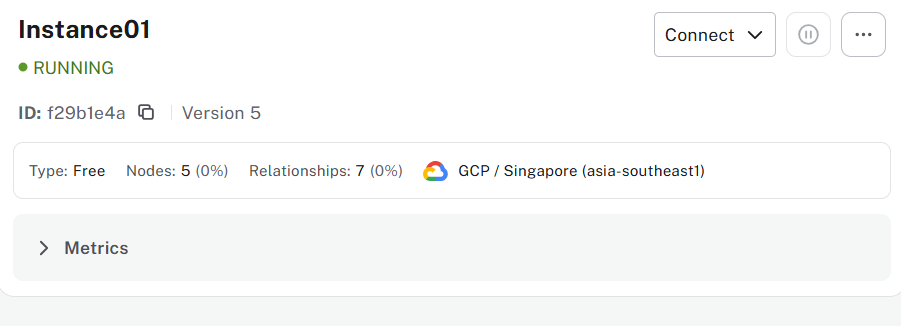

Now see node and relationship stored

In [ ]:
# directly show the graph resulting from the given Cypher query
default_cypher = "MATCH (s)-[r:!MENTIONS]->(t) RETURN s,r,t LIMIT 50"

In [ ]:
default_cypher

'MATCH (s)-[r:!MENTIONS]->(t) RETURN s,r,t LIMIT 50'

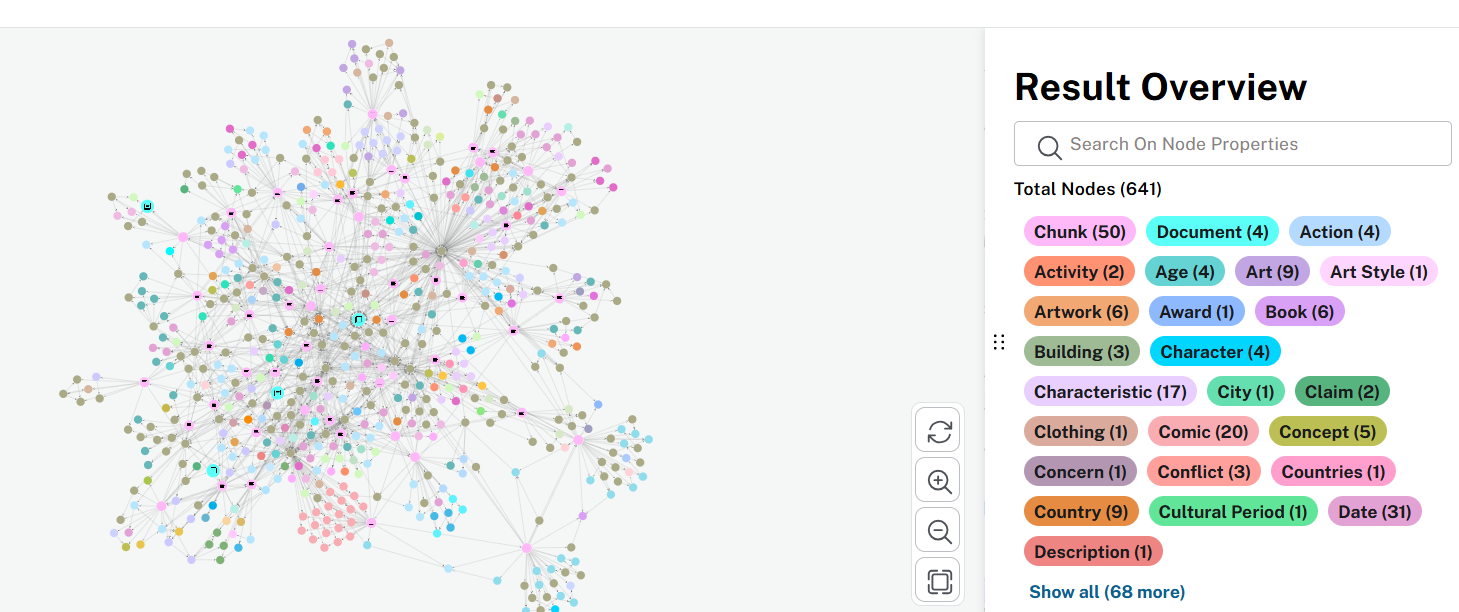

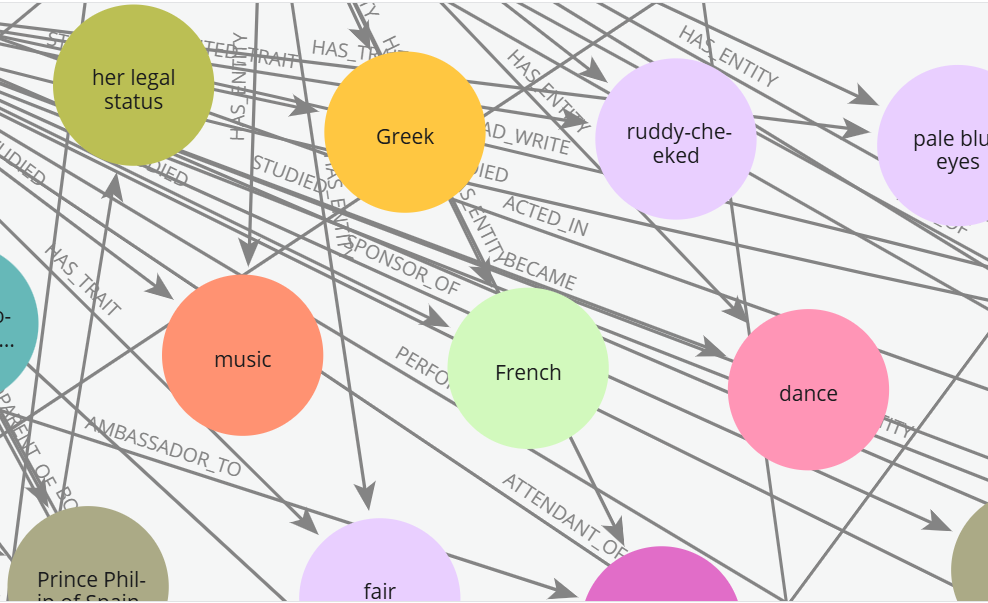

This is how Neo4j stores data in relationship graph databases.

In [ ]:
!pip install yfiles-jupyter-graphs --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.4 MB/s eta 0:00:00


In [ ]:

from yfiles_jupyter_graphs import GraphWidget
from neo4j import GraphDatabase


In [ ]:
try:
  import google.colab
  from google.colab import output
  output.enable_custom_widget_manager()
except:
  pass

In [ ]:
def showGraph(cypher: str = default_cypher):
    # create a neo4j session to run queries
    driver = GraphDatabase.driver(
        uri = os.environ["NEO4J_URI"],
        auth = (os.environ["NEO4J_USERNAME"],
                os.environ["NEO4J_PASSWORD"]))
    session = driver.session()
    widget = GraphWidget(graph = session.run(cypher).graph())
    widget.node_label_mapping = 'id'
    display(widget)
    return widget


In [ ]:

showGraph()

# same graph will be opened in web format

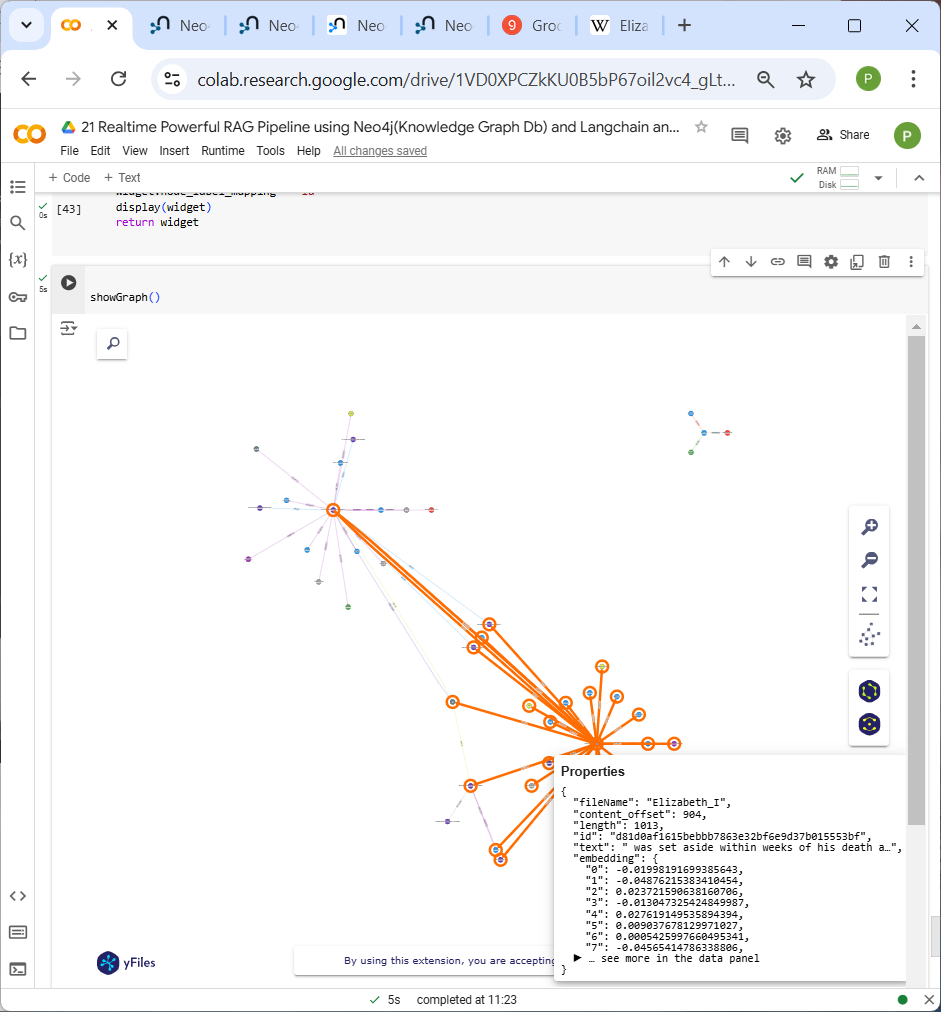

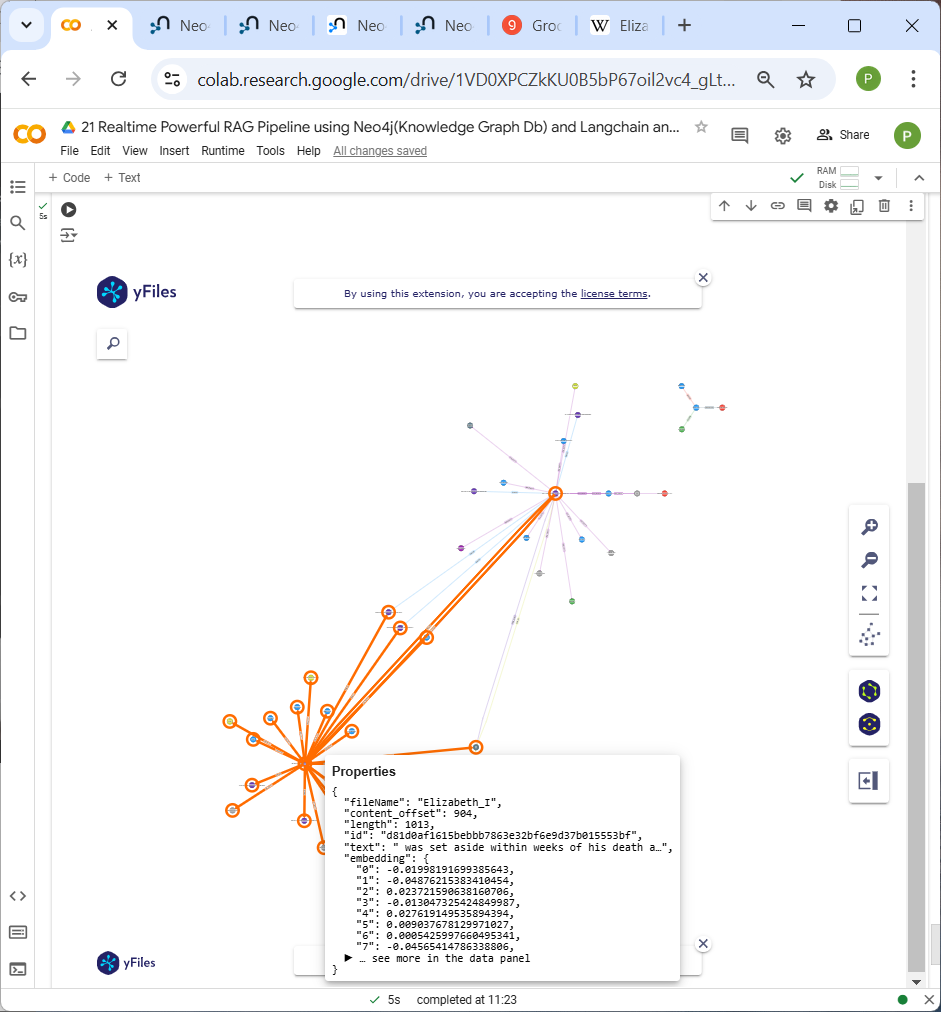

In [ ]:
from typing import Tuple, List, Optional

In [ ]:

from langchain_community.vectorstores import Neo4jVector

But bhai llama 3.3 me to embedding milti nhi hai.

* OpenAI
* Azure
* Google
* AWS
* HuggingFace
* Ollama
* Cohere
* MistralAI
* Nomic
* NVIDIA
* Voyage AI
* Fake

Plateforms/models which are supported in langchain embedding

In [ ]:
%pip install --upgrade --quiet  langchain sentence_transformers --quiet

In [ ]:
!pip install langchain_huggingface

In [ ]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

In [ ]:
vector_index = Neo4jVector.from_existing_graph(
    HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"),
    search_type = "hybrid",
    node_label = "Document",
    text_node_properties = ["text"],
    embedding_node_property = "embedding"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

ValueError: Index with name vector already exists.The provided embedding function and vector index dimensions do not match.
Embedding function dimension: 768
Vector index dimension: 384

In [ ]:
vector_index = Neo4jVector.from_existing_graph(
    HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2", truncate_dim=384),
    search_type = "hybrid",
    node_label = "Document",
    text_node_properties = ["text"],
    embedding_node_property = "embedding"
)

ValidationError: 1 validation error for HuggingFaceEmbeddings
truncate_dim
  Extra inputs are not permitted [type=extra_forbidden, input_value=384, input_type=int]
    For further information visit https://errors.pydantic.dev/2.10/v/extra_forbidden

In [ ]:
vector_index = Neo4jVector.from_existing_graph(
    HuggingFaceEmbeddings(model_name="sentence-transformers/msmarco-MiniLM-L-12-v3"),
    search_type = "hybrid",
    node_label = "Document",
    text_node_properties = ["text"],
    embedding_node_property = "embedding"
)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.72k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Bhai 384 dimension ki embedding banane wala koi to mila : thank you : sentence-transformers/**msmarco-MiniLM-L-12-v3**

In [ ]:

graph.query("CREATE FULLTEXT INDEX entity IF NOT EXISTS FOR (e:__Entity__) ON EACH [e.id]")

[]

In [ ]:

from langchain_core.pydantic_v1 import BaseModel, Field
# Extract entities from text
class Entities(BaseModel):
    """Identifying information about entities."""

    names: List[str] = Field(
        ...,
        description="All the person, organization, or business entities that "
        "appear in the text",
    )


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.prompts.prompt import PromptTemplate


In [ ]:

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are extracting organization and person entities from the text.",
        ),
        (
            "human",
            "Use the given format to extract information from the following "
            "input: {question}",
        ),
    ]
)

In [ ]:

entity_chain = prompt | llm.with_structured_output(Entities)

In [ ]:

entity_chain.invoke({"question": "Where was Amelia Earhart born?"}).names

['Amelia Earhart']

In [ ]:

from langchain_community.vectorstores.neo4j_vector import remove_lucene_chars

In [ ]:

def generate_full_text_query(input: str) -> str:
    full_text_query = ""
    words = [el for el in remove_lucene_chars(input).split() if el]
    for word in words[:-1]:
        full_text_query += f" {word}~2 AND"
    full_text_query += f" {words[-1]}~2"
    return full_text_query.strip()


In [ ]:

# Fulltext index query
def structured_retriever(question: str) -> str:
    result = ""
    entities = entity_chain.invoke({"question": question})
    for entity in entities.names:
        response = graph.query(
            """CALL db.index.fulltext.queryNodes('entity', $query, {limit:2})
            YIELD node,score
            CALL {
              WITH node
              MATCH (node)-[r:!MENTIONS]->(neighbor)
              RETURN node.id + ' - ' + type(r) + ' -> ' + neighbor.id AS output
              UNION ALL
              WITH node
              MATCH (node)<-[r:!MENTIONS]-(neighbor)
              RETURN neighbor.id + ' - ' + type(r) + ' -> ' +  node.id AS output
            }
            RETURN output LIMIT 50
            """,
            {"query": generate_full_text_query(entity)},
        )
        result += "\n".join([el['output'] for el in response])
    return result


In [ ]:

print(structured_retriever("Who is Elizabeth I?"))


<ipython-input-73-bcc56ddd5940>:3: LangChainDeprecationWarning: The function `remove_lucene_chars` was deprecated in LangChain 0.3.8 and will be removed in 1.0. An updated version of the function exists in the :meth:`~langchain-neo4j package and should be used instead. To use it run `pip install -U :meth:`~langchain-neo4j` and import as `from :meth:`~langchain_neo4j.vectorstores.neo4j_vector import remove_lucene_chars``.
  words = [el for el in remove_lucene_chars(input).split() if el]


Elizabeth I - WAS -> Queen of England and Ireland
Elizabeth I - RULED_FROM -> 17 November 1558
Elizabeth I - RULED_UNTIL -> 24 March 1603
Elizabeth I - BELONGED_TO -> House of Tudor
Elizabeth I - CHILD_OF -> Henry VIII
Elizabeth I - CHILD_OF -> Anne Boleyn
Elizabeth I - DECLARED -> illegitimate
Elizabeth I - SUCCEEDED -> Mary I
Elizabeth I - ERA_NAMED_AFTER -> Elizabethan Era
Elizabeth I - DIED_IN -> 1603
Elizabeth I - RULED -> England
Elizabeth I - AVOIDED -> establishing the order of succession
Elizabeth I - FEARED -> for her own life
Elizabeth I - CONCERNED_WITH -> forming a productive relationship with Scotland
Elizabeth I - OUTLIVED -> Edward VI
Elizabeth I - OUTLIVED -> Mary Grey
Elizabeth I - OUTLIVED -> Margaret Clifford
Elizabeth I - OUTLIVED -> Jane Grey
Elizabeth I - OUTLIVED -> Mary I
Elizabeth I - OUTLIVED -> Katherine Grey
Elizabeth I - INVOLVED_IN -> Anglo-Spanish War
Elizabeth I - LONGEST_SERVING_MONARCH -> Tudor
Elizabeth I - PROVIDED_STABILITY_AFTER -> troubled reigns

In [ ]:

def retriever(question: str):
    print(f"Search query: {question}")
    structured_data = structured_retriever(question)
    unstructured_data = [el.page_content for el in vector_index.similarity_search(question)]
    final_data = f"""Structured data:
{structured_data}
Unstructured data:
{"#Document ". join(unstructured_data)}
    """
    return final_data

In [ ]:

_template = """Given the following conversation and a follow up question, rephrase the follow up question to be a standalone question,
in its original language.
Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:"""

In [ ]:

CONDENSE_QUESTION_PROMPT = PromptTemplate.from_template(_template)

In [ ]:
def _format_chat_history(chat_history: List[Tuple[str, str]]) -> List:
    buffer = []
    for human, ai in chat_history:
        buffer.append(HumanMessage(content=human))
        buffer.append(AIMessage(content=ai))
    return buffer


In [ ]:
from langchain_core.runnables import (
    RunnableBranch,
    RunnableLambda,
    RunnableParallel,
    RunnablePassthrough,
)

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser

In [ ]:

_search_query = RunnableBranch(
    # If input includes chat_history, we condense it with the follow-up question
    (
        RunnableLambda(lambda x: bool(x.get("chat_history"))).with_config(
            run_name="HasChatHistoryCheck"
        ),  # Condense follow-up question and chat into a standalone_question
        RunnablePassthrough.assign(
            chat_history=lambda x: _format_chat_history(x["chat_history"])
        )
        | CONDENSE_QUESTION_PROMPT
        | llm # this is or llama 3.3
        | StrOutputParser(),
    ),
    # Else, we have no chat history, so just pass through the question
    RunnableLambda(lambda x : x["question"]),
)

In [ ]:

template = """Answer the question based only on the following context:
{context}

Question: {question}
Use natural language and be concise.
Answer:"""

In [ ]:
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
chain = (
    RunnableParallel(
        {
            "context": _search_query | retriever,
            "question": RunnablePassthrough(),
        }
    )
    | prompt
    | llm
    | StrOutputParser()
)

In [ ]:
chain.invoke({"question": "Which house did Elizabeth I belong to?"})

Search query: Which house did Elizabeth I belong to?


'Elizabeth I belonged to the House of Tudor.'

In [ ]:

chain.invoke(
    {
        "question": "When was she born?",
        "chat_history": [("Which house did Elizabeth I belong to?", "House Of Tudor")],
    }
)

Search query: When was Elizabeth I born?


'Elizabeth I was born on 7 September 1533.'

In [ ]:
chain.invoke({"question" : "What s the fastest train in the Indian Railway?"})

Search query: What s the fastest train in the Indian Railway?


'There is no information about the Indian Railway in the context provided.'